In [ ]:
#@title Setup (Do NOT modify)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/final
!pip install openai-clip

Mounted at /content/drive
/content/drive/MyDrive/final
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.6 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368604 sha256=05211b1fba90b54f9787c2d7f962cafda49c4bc489f690d1d91e7b8f1112f8c1
  Stored in directory: /root/.cache/pip/wheels/08/77/8e/8d2f862df6bf7fb4e2007062d2cbaeae49862ec7b56d041229
Successfully built openai-clip


In [ ]:
import zipfile
import json

# 압축 파일 경로
zip_file_path = '/content/drive/MyDrive/final/test_data.zip'
extracted_folder_path = '/content/extracted_data'  # 압축을 푼 폴더 경로

# 압축 파일 풀기
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# dataset.json 파일 경로
dataset_json_path = os.path.join(extracted_folder_path, 'dataset.json')

# JSON 파일 읽기
with open(dataset_json_path, 'r') as f:
    dataset_json = json.load(f)

# 일부 데이터 확인
print(dataset_json.keys())  # JSON 파일의 최상위 키 값들을 출력


In [ ]:
len(dataset_json['clip_img_features'][0][1]), len(dataset_json['clip_txt_features'])

(512, 6000)

In [ ]:
print(dataset_json['clip_txt_features'][0][1])

[[0.1845703125, 0.474365234375, -0.2197265625, -0.08624267578125, 0.0279541015625, -0.187744140625, -0.398193359375, 0.10296630859375, 0.043060302734375, 0.239990234375, 0.1490478515625, -0.061553955078125, 0.1513671875, -0.00836944580078125, 0.6640625, -0.044647216796875, 0.1419677734375, -0.0026416778564453125, -0.2607421875, 0.0714111328125, 0.169921875, 0.263427734375, -0.266845703125, -0.06085205078125, -0.376953125, 0.10845947265625, -0.11663818359375, 0.11407470703125, 0.173583984375, -0.436767578125, 0.156494140625, 0.0072174072265625, -0.017242431640625, -0.162109375, -0.115478515625, 0.0244293212890625, 0.00850677490234375, 0.07415771484375, -0.048797607421875, 0.455078125, -0.143798828125, 0.05157470703125, -0.69287109375, 0.2061767578125, 0.39404296875, 0.427734375, 0.310546875, -0.0943603515625, -0.3251953125, -0.139892578125, -0.137451171875, 0.1302490234375, 0.333984375, -0.48388671875, -0.10675048828125, -0.1109619140625, 0.272216796875, -0.0611572265625, 0.5380859375, 

In [ ]:
#@title Data preprocessing (Train)
!python preproc_datasets_celeba_zip_train.py --source=./multimodal_celeba_hq.zip --dest train_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

In [ ]:
#@title Data preprocessing (Test)
!python preproc_datasets_celeba_zip_test.py --source=./multimodal_celeba_hq.zip --dest test_data_6cap.zip --emb_dim 512 --transform=center-crop --width=256 --height=256

In [ ]:
#@title Train

train_data = "train_data_4cap.zip"#@param {"type": "string"}
batch_size = 24 #@param {"type": "integer"}
num_epochs = 10 #@param {"type": "integer"}
learning_rate = 0.0002 #@param {"type": "number"}
report_interval = 50 #@param {"type": "integer"}
noise_dim = 100 #@param {"type": "integer"}
projection_dim = 128 #@param {"type": "integer"}
clip_embedding_dim = 512 #@param {"type": "integer"}
checkpoint_path = "model_exp3" #@param {"type": "string"}
result_path = "images_exp3" #@param {"type": "string"}
use_uncond_loss = True #@param {"type": "boolean"}
use_contrastive_loss = True #@param {"type": "boolean"}
num_stage = 3 #@param {"type": "integer"}
resume_checkpoint_path = "None" #@param {"type": "string"}
resume_epoch = -1 #@param {"type": "integer"}

test_cmd = f'''python main.py \
    --train_data "{train_data}" \
    --batch_size {batch_size} \
    --num_epochs {num_epochs} \
    --learning_rate {learning_rate} \
    --report_interval {report_interval} \
    --noise_dim {noise_dim} \
    --projection_dim {projection_dim} \
    --clip_embedding_dim {clip_embedding_dim} \
    --checkpoint_path "{checkpoint_path}" \
    --result_path "{result_path}" \
    --num_stage {num_stage} \
    --resume_epoch {resume_epoch} \
    '''
if use_uncond_loss:
    test_cmd += "--use_uncond_loss "
if use_contrastive_loss:
    test_cmd += "--use_contrastive_loss "
if resume_checkpoint_path != "None":
    test_cmd += f'''--resume_checkpoint_path "{resume_checkpoint_path}"'''

with open('./train_script.sh', 'w') as file:
    file.write(test_cmd)

!bash train_script.sh

Loading dataset
finish
Epoch: 0 start
    Iteration 50 	 d_loss: 14.0510, g_loss: 31.6928
    Iteration 100 	 d_loss: 13.0680, g_loss: 30.6395
    Iteration 150 	 d_loss: 13.6512, g_loss: 35.3243
    Iteration 200 	 d_loss: 13.1307, g_loss: 32.9208
    Iteration 250 	 d_loss: 13.4443, g_loss: 27.8908
    Iteration 300 	 d_loss: 12.8919, g_loss: 28.2041
    Iteration 350 	 d_loss: 14.7844, g_loss: 43.9344
    Iteration 400 	 d_loss: 14.4154, g_loss: 31.1442
    Iteration 450 	 d_loss: 14.6063, g_loss: 21.4324
    Iteration 500 	 d_loss: 13.6269, g_loss: 21.0007
    Iteration 550 	 d_loss: 13.8184, g_loss: 22.1674
    Iteration 600 	 d_loss: 14.7685, g_loss: 23.4181
    Iteration 650 	 d_loss: 13.3970, g_loss: 21.3081
    Iteration 700 	 d_loss: 13.2200, g_loss: 20.7227
    Iteration 750 	 d_loss: 13.6750, g_loss: 22.2809
    Iteration 800 	 d_loss: 13.7876, g_loss: 24.9833
    Iteration 850 	 d_loss: 14.0547, g_loss: 25.1640


In [ ]:
import torch

# 가상의 예시 데이터 생성
batch_size = 4
embedding_size = 3

# image_features 텐서와 txt_embedding 텐서 생성
image_features = torch.randn(batch_size, embedding_size)  # 예시로 랜덤한 값으로 채워진 텐서
txt_embedding = torch.randn(batch_size, embedding_size)    # 예시로 랜덤한 값으로 채워진 텐서

# 코사인 유사도 계산
sim = torch.cosine_similarity(image_features.unsqueeze(1), txt_embedding.unsqueeze(0), dim=-1)

print(sim)
torch.cosine_similarity(image_features, txt_embedding, dim=1)

tensor([[ 0.5145, -0.5443,  0.8216, -0.1945],
        [-0.1038, -0.2600,  0.9684,  0.2069],
        [ 0.9045, -0.8135,  0.0662, -0.2225],
        [ 0.1069, -0.0736,  0.8157, -0.2089]])


tensor([ 0.5145, -0.2600,  0.0662, -0.2089])

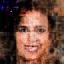

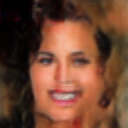

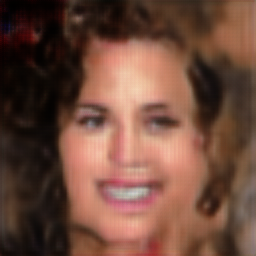

In [ ]:
#@title Test (Generate image)

prompt = "The woman is young and has blond hair, and arched eyebrows."#@param {"type": "string"}
load_epoch = 0 #@param {"type": "integer"}
checkpoint_path = "model_exp1" #@param {"type": "string"}

test_cmd = f'''python generate_image.py \
    --prompt "{prompt}" \
    --load_epoch {load_epoch} \
    --checkpoint_path "{checkpoint_path}"
    '''

with open('./test_script.sh', 'w') as file:
    file.write(test_cmd)

!bash test_script.sh


from IPython.display import Image
import os
img_64 = Image(os.path.join("result_64.png"))
display(img_64)
img_128 = Image(os.path.join("result_128.png"))
display(img_128)
img_256 = Image(os.path.join("result_256.png"))
display(img_256)

FID 계산 코드1

In [ ]:
from cleanfid import fid
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# import zipfile
# import os

# zip_path = "/content/drive/MyDrive/final/test_data.zip"  # Replace with actual path
# extract_path = "/content/drive/MyDrive/final/test_txt"  # Replace with desired extraction path

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

In [ ]:
import json

file_path = '/content/drive/MyDrive/final/test_txt/dataset.json'  # JSON 파일 경로, 실제 경로로 대체하세요

with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# data 변수에 JSON 파일의 내용이 파싱되어 저장됨
print(data)  # JSON 파일의 내용을 출력

In [ ]:
data.keys()

dict_keys(['clip_img_features', 'clip_txt_features'])

In [ ]:
len(data['clip_txt_features'][2][1])

6

In [ ]:
len(data['clip_img_features'][1][1])

512

In [ ]:
folder_path1 = os.path.join(extract_path, "00000")
folder_path2 = os.path.join(extract_path, "00001")
from cleanfid import fid

score = fid.compute_fid(folder_path1, folder_path2)
print("FID Score:", score)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


compute FID between two folders
Found 1000 images in the folder /content/data/00000


FID 00000 : 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]


Found 1000 images in the folder /content/data/00001


FID 00001 : 100%|██████████| 32/32 [00:10<00:00,  2.97it/s]


FID Score: 24.657385703174782


In [ ]:
score = fid.compute_fid('/content/drive/MyDrive/final/1', '/content/drive/MyDrive/final/1')
print("FID Score:", score)

compute FID between two folders
Found 1 images in the folder /content/drive/MyDrive/final/1


FID 1 : 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Found 1 images in the folder /content/drive/MyDrive/final/1


FID 1 : 100%|██████████| 1/1 [00:07<00:00,  7.56s/it]

FID Score: 0.0


FID 계산 코드2

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()

# Select a subset of images for the activation dataset
num_samples = 10
activation_images = x_train[:num_samples]

# Convert the images to [0, 1] range and flatten them
activation_images = activation_images.astype('float32') / 255.0
activation_images = activation_images.reshape(num_samples, -1)

# Now you can use activation_images as act1 or act2 in the given code

In [ ]:
from PIL import Image
import numpy as np

def load_and_preprocess_image(image_path, target_size=(H, W)):
    # Load the image
    img = Image.open(image_path)

    # Resize the image to the target size
    img = img.resize(target_size, Image.ANTIALIAS)

    # Convert the image to numpy array
    img_array = np.array(img)

    # Convert pixel values to range [0, 1]
    img_array = img_array / 255.0

    # Transpose the array to match the shape (3, H, W)
    img_array = img_array.transpose((2, 0, 1))

    return img_array

# Example usage
image_path = '' # 이미지 경로
image_array = load_and_preprocess_image(image_path, target_size=(H, W))

In [ ]:
# example of calculating the frechet inception distance
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm

# calculate frechet inception distance
def calculate_fid(act1, act2):
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

# define two collections of activations
act1 = random(10*2048)
act1 = act1.reshape((10,2048))
act2 = random(10*2048)
act2 = act2.reshape((10,2048))
# fid between act1 and act1
fid = calculate_fid(act1, act1)
print('FID (same): %.3f' % fid)
# fid between act1 and act2
fid = calculate_fid(act1, act2)
print('FID (different): %.3f' % fid)

FID (same): -0.000
FID (different): 356.768


IS 계산 코드

In [ ]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.nn import functional as F
import torch.utils.data

from torchvision.models.inception import inception_v3

import numpy as np
from scipy.stats import entropy

def inception_score(imgs, cuda=True, batch_size=32, resize=False, splits=1):
    """Computes the inception score of the generated images imgs

    imgs -- Torch dataset of (3xHxW) numpy images normalized in the range [-1, 1]
    cuda -- whether or not to run on GPU
    batch_size -- batch size for feeding into Inception v3
    splits -- number of splits
    """
    N = len(imgs)

    assert batch_size > 0
    assert N >= batch_size

    # Set up dtype
    if cuda:
        dtype = torch.cuda.FloatTensor
    else:
        if torch.cuda.is_available():
            print("WARNING: You have a CUDA device, so you should probably set cuda=True")
        dtype = torch.FloatTensor

    # Set up dataloader
    dataloader = torch.utils.data.DataLoader(imgs, batch_size=batch_size)

    # Load inception model
    inception_model = inception_v3(pretrained=True, transform_input=False).type(dtype)
    inception_model.eval();
    up = nn.Upsample(size=(299, 299), mode='bilinear').type(dtype)
    def get_pred(x):
        if resize:
            x = up(x)
        x = inception_model(x)
        return F.softmax(x).data.cpu().numpy()

    # Get predictions
    preds = np.zeros((N, 1000))

    for i, batch in enumerate(dataloader, 0):
        batch = batch.type(dtype)
        batchv = Variable(batch)
        batch_size_i = batch.size()[0]

        preds[i*batch_size:i*batch_size + batch_size_i] = get_pred(batchv)

    # Now compute the mean kl-div
    split_scores = []

    for k in range(splits):
        part = preds[k * (N // splits): (k+1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))

    return np.mean(split_scores), np.std(split_scores)

if __name__ == '__main__':
    class IgnoreLabelDataset(torch.utils.data.Dataset):
        def __init__(self, orig):
            self.orig = orig

        def __getitem__(self, index):
            return self.orig[index][0]

        def __len__(self):
            return len(self.orig)

    import torchvision.datasets as dset
    import torchvision.transforms as transforms

    cifar = dset.CIFAR10(root='data/', download=True,
                             transform=transforms.Compose([
                                 transforms.Resize(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                             ])
    )

    IgnoreLabelDataset(cifar)

    print ("Calculating Inception Score...")
    print (inception_score(IgnoreLabelDataset(cifar), cuda=True, batch_size=32, resize=True, splits=10))

Files already downloaded and verified
Calculating Inception Score...


<ipython-input-5-59897de04ffa>:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


(9.67277863604414, 0.14991474883501335)


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# 이미지를 불러오고 Torch dataset으로 변환
img_path = '/content/drive/MyDrive/final/result_64.png'
img = Image.open(img_path)
transform = transforms.Compose([
    transforms.Resize(299),  # Inception 모델 입력 크기에 맞게 조정
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
img = transform(img).unsqueeze(0)  # 배치 차원 추가

# inception_score 함수 호출
print("Calculating Inception Score...")
score_mean, score_std = inception_score(img, cuda=True, batch_size=1, resize=True, splits=10)
print("Inception Score Mean:", score_mean)
print("Inception Score Std:", score_std)

Calculating Inception Score...
Inception Score Mean: nan
Inception Score Std: nan


<ipython-input-5-59897de04ffa>:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# 이미지를 불러오고 Torch dataset으로 변환
img_path = '/content/drive/MyDrive/final/result_64.png'
img = Image.open(img_path)
transform = transforms.Compose([
    transforms.Resize(299),  # Inception 모델 입력 크기에 맞게 조정
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
img = transform(img).unsqueeze(0)  # 배치 차원 추가

# inception_score 함수 호출
print("Calculating Inception Score...")
score_mean, score_std = inception_score(img, cuda=True, batch_size=1, resize=True, splits=10)
print("Inception Score Mean:", score_mean)
print("Inception Score Std:", score_std)

Calculating Inception Score...
Inception Score Mean: nan
Inception Score Std: nan


<ipython-input-5-59897de04ffa>:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()
